# Implementacion de arboles de desisción

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [55]:
iris = load_iris()

In [56]:
X = iris.data
y = iris.target

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
model = DecisionTreeClassifier(max_depth=4).fit(X_train,y_train)

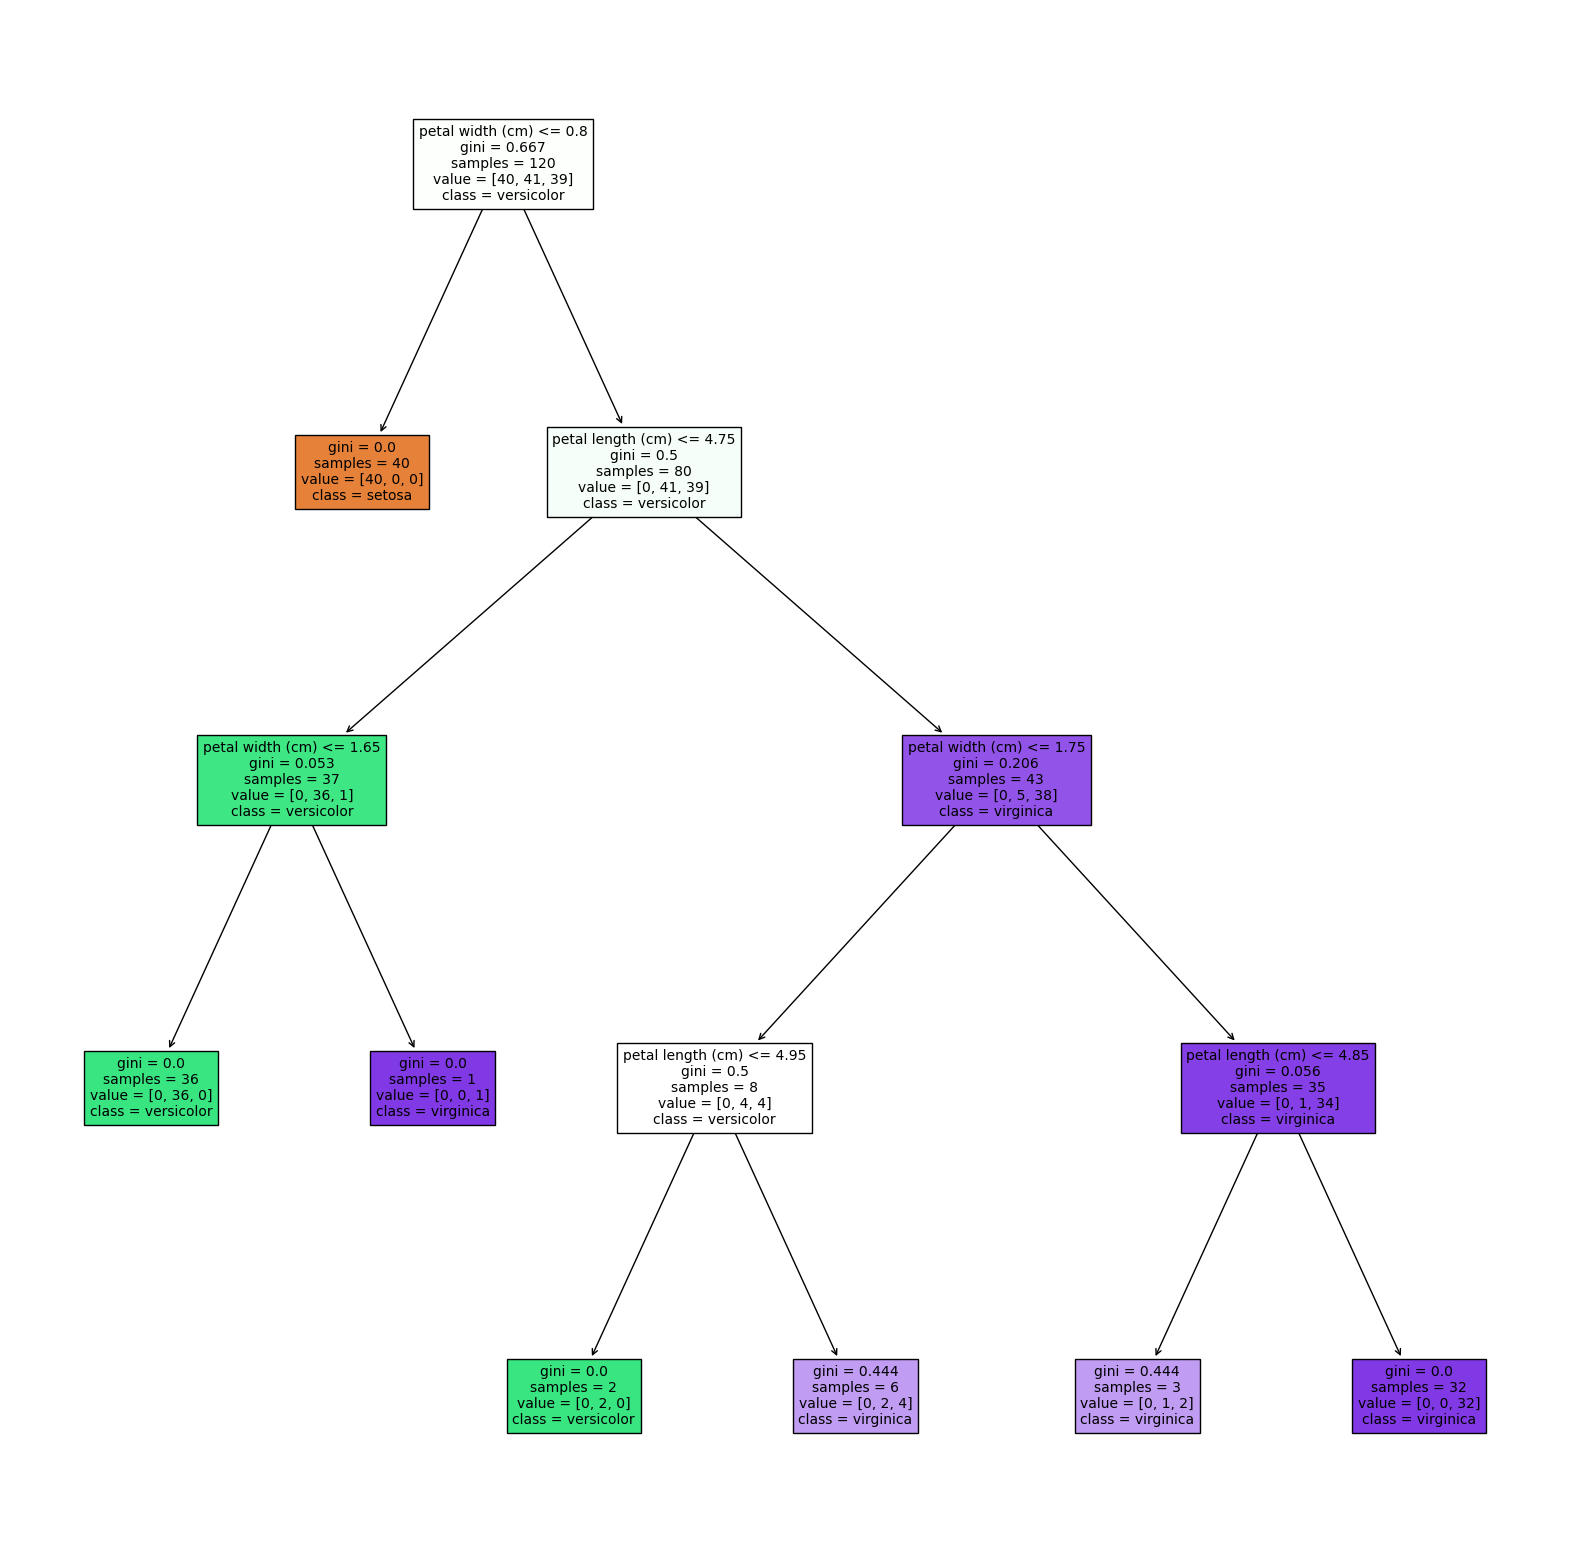

In [68]:
plt.figure(figsize=(20,20))
tree.plot_tree(model,feature_names=iris.feature_names, class_names=iris.target_names, filled=True, fontsize=10)
plt.show()

In [69]:
y_pred = model.predict(X_test)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
print(classification_report(y_train,model.predict(X_train), target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       1.00      0.93      0.96        41
   virginica       0.93      1.00      0.96        39

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.97       120
weighted avg       0.98      0.97      0.97       120



In [72]:
print(classification_report(y_test,y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [73]:
from sklearn.model_selection import GridSearchCV, KFold

In [74]:
parametros = {
    'ccp_alpha': [0.0,0.01,0.1],
    'max_depth': [None, 2,3,4,5,10]
}
cv = KFold(n_splits=5,shuffle=True,random_state=42)
pc_grid = GridSearchCV(model, parametros, cv = cv,scoring='accuracy')
pc_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'max_depth': [None, 2, 3, 4, 5, 10]},
             scoring='accuracy')

In [75]:
pc_grid.best_params_

{'ccp_alpha': 0.0, 'max_depth': 4}